<a href="https://colab.research.google.com/github/Abdullah2020/Hamoye-2022-Capstone-Project_Neural_Network_Group/blob/master/Hamoye_Capstone_Project_Neural_Network_Daily_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE PROJECT: INJURY PREDICTION (Daily approach dataset)**

By

### **NEURAL-NETWORK TEAM**

This is a notebook by Hamoye 2022 Summer Intership Capston Project [Neural-Network Group]

In sports, injuries are common things that athletes sustain. Machine learning (ML) methods could be used to improve injury prediction and allow development of proper approaches to injury prevention. Thus, the aim of our study was therefore to develop a machine learning model that can predict injuries based on how the training regiment of an athlete. This can be used to make injury prevention approaches easier to develop.


This Notebook makes use of several Python libraries like Pandas (for Data Cleaning/Manipulation), MatPlotlib (for Data Exploration), Plotly (for some Data Visualisation), Scikit-learn (for Building Machine Learning Model) etc.



## **Contents**

Introduction

1. Import Libraries

2. Data Sourcing

3. Data Wrangling

4. Exploratory Data Analysis

5. Model Training and Model Evaluation

# **1.0 Import Libraries**

Import all the necessaries libraries to be used in this notebook. The group prefer to do this at the initial stage and added more libraries as the project progresses. 

In [1]:
#Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from sklearn.datasets import make_classification
from collections import Counter
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

print("Setup Completed...!")

Setup Completed...!


# **2.0 Data Sourcing**

In this project, we were able to get the dataset from Kaggle and Pandas library was used to load the dataset as a comma separated values(csv) file format.

In [2]:
df_day = pd.read_csv('/content/day_approach_maskedID_timeseries.csv')

# **3.0 Data Wrangling**

In [3]:
df_day.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4


In [4]:
df_day.tail()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
42761,1.0,16.0,0.0,0.0,0.0,0.0,0.0,0.54,0.22,0.30,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2143
42762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2286
42763,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.94,0.88,0.11,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2483
42764,1.0,15.1,0.0,0.0,0.0,0.0,0.0,0.87,0.86,0.20,...,0.0,0.0,0.0,0.0,0.79,0.80,0.11,71,1,2647
42765,1.0,12.2,0.0,0.0,0.0,0.0,0.0,0.96,0.95,0.20,...,0.0,0.0,0.0,0.0,0.51,0.83,0.15,71,1,2673


In [5]:
print("There are {} rows and {} columns in the dataset.".format(df_day.shape[0], df_day.shape[1]))

There are 42766 rows and 73 columns in the dataset.


In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nr. sessions                 42766 non-null  float64
 1   total km                     42766 non-null  float64
 2   km Z3-4                      42766 non-null  float64
 3   km Z5-T1-T2                  42766 non-null  float64
 4   km sprinting                 42766 non-null  float64
 5   strength training            42766 non-null  float64
 6   hours alternative            42766 non-null  float64
 7   perceived exertion           42766 non-null  float64
 8   perceived trainingSuccess    42766 non-null  float64
 9   perceived recovery           42766 non-null  float64
 10  nr. sessions.1               42766 non-null  float64
 11  total km.1                   42766 non-null  float64
 12  km Z3-4.1                    42766 non-null  float64
 13  km Z5-T1-T2.1   

In [7]:
df_day.describe()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
count,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,...,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000
mean,0.829561,7.038187,0.691381,0.579930,0.073016,0.116237,0.163492,0.247788,0.349802,0.195898,...,0.580347,0.072595,0.116120,0.162308,0.247550,0.349503,0.196224,34.550858,0.013632,1228.039892
std,0.580696,7.473216,2.317657,1.811938,0.483480,0.326010,0.549664,0.257262,0.368300,0.190321,...,1.814538,0.483691,0.326016,0.554031,0.256718,0.368042,0.190568,19.050033,0.115960,807.021168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,20.000000,0.000000,436.000000
50%,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.160000,...,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.170000,34.000000,0.000000,1256.000000
75%,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,50.000000,0.000000,1913.000000
max,2.000000,55.900000,42.200000,48.000000,40.000000,2.000000,10.220000,1.000000,1.000000,1.000000,...,48.000000,40.000000,2.000000,20.000000,1.000000,1.000000,1.000000,73.000000,1.000000,2673.000000


In [8]:
df_day.dtypes

nr. sessions                   float64
total km                       float64
km Z3-4                        float64
km Z5-T1-T2                    float64
km sprinting                   float64
                                ...   
perceived trainingSuccess.6    float64
perceived recovery.6           float64
Athlete ID                       int64
injury                           int64
Date                             int64
Length: 73, dtype: object

In [9]:
df_day.nunique()

nr. sessions                      3
total km                        384
km Z3-4                         174
km Z5-T1-T2                     134
km sprinting                     78
                               ... 
perceived trainingSuccess.6     102
perceived recovery.6            100
Athlete ID                       74
injury                            2
Date                           2614
Length: 73, dtype: int64

In [10]:
df_day.columns

Index(['nr. sessions', 'total km', 'km Z3-4', 'km Z5-T1-T2', 'km sprinting',
       'strength training', 'hours alternative', 'perceived exertion',
       'perceived trainingSuccess', 'perceived recovery', 'nr. sessions.1',
       'total km.1', 'km Z3-4.1', 'km Z5-T1-T2.1', 'km sprinting.1',
       'strength training.1', 'hours alternative.1', 'perceived exertion.1',
       'perceived trainingSuccess.1', 'perceived recovery.1', 'nr. sessions.2',
       'total km.2', 'km Z3-4.2', 'km Z5-T1-T2.2', 'km sprinting.2',
       'strength training.2', 'hours alternative.2', 'perceived exertion.2',
       'perceived trainingSuccess.2', 'perceived recovery.2', 'nr. sessions.3',
       'total km.3', 'km Z3-4.3', 'km Z5-T1-T2.3', 'km sprinting.3',
       'strength training.3', 'hours alternative.3', 'perceived exertion.3',
       'perceived trainingSuccess.3', 'perceived recovery.3', 'nr. sessions.4',
       'total km.4', 'km Z3-4.4', 'km Z5-T1-T2.4', 'km sprinting.4',
       'strength training.4',

# **4.0 Exploratory data analysis (EDA)**

**4.1 Missing values**

In [11]:
df_day.isnull().sum().any()

False

There doesn't seem to be any null values in any of our records.

0    42183
1      583
Name: injury, dtype: int64


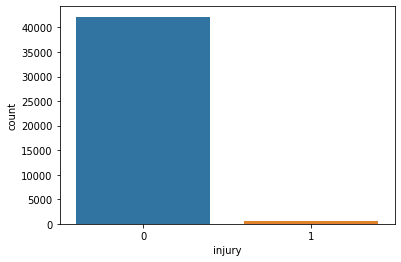

In [12]:
print(df_day['injury'].value_counts())
sns.countplot(df_day['injury'])

In our entire dataset, there are a total of 42183 times when an athlete didn't got injured, and 583 times when an athlete got injured.

In [13]:
print(df_day['nr. sessions'].sum())
print(df_day['nr. sessions.1'].sum())
print(df_day['nr. sessions.2'].sum())
print(df_day['nr. sessions.3'].sum())
print(df_day['nr. sessions.4'].sum())
print(df_day['nr. sessions.5'].sum())
print(df_day['nr. sessions.6'].sum())

35477.0
35453.0
35477.0
35465.0
35490.0
35443.0
35445.0


We can see that on an average, the sum of total number of session for all the athletes collectively for all weeks is same.

In [14]:
df_ath_ses = pd.DataFrame()
df_ath_ses['Day0'] = df_day.groupby('Athlete ID')['nr. sessions'].sum()
df_ath_ses['Day1'] = df_day.groupby('Athlete ID')['nr. sessions.1'].sum()
df_ath_ses['Day2'] = df_day.groupby('Athlete ID')['nr. sessions.2'].sum()
df_ath_ses['Day3'] = df_day.groupby('Athlete ID')['nr. sessions.3'].sum()
df_ath_ses['Day4'] = df_day.groupby('Athlete ID')['nr. sessions.4'].sum()
df_ath_ses['Day5'] = df_day.groupby('Athlete ID')['nr. sessions.5'].sum()
df_ath_ses['Day6'] = df_day.groupby('Athlete ID')['nr. sessions.6'].sum()

In [15]:
df_ath_ses.reset_index(inplace=True)

In [16]:
df_ath_ses.head()

,Athlete ID,Day0,Day1,Day2,Day3,Day4,Day5,Day6
0,0,181.0,181.0,182.0,180.0,181.0,180.0,179.0
1,1,399.0,398.0,397.0,396.0,396.0,394.0,394.0
2,2,1024.0,1028.0,1025.0,1025.0,1026.0,1023.0,1024.0
3,3,282.0,282.0,281.0,280.0,279.0,277.0,275.0
4,4,621.0,623.0,624.0,627.0,627.0,627.0,623.0


The above dataframe shows total number of sessions each Athlete had for all the weeks of their training.

In [17]:
df_ath_ses['sum'] = df_ath_ses.loc[0:,['Day0','Day1','Day2','Day3','Day4','Day5','Day6']].sum(axis=1)

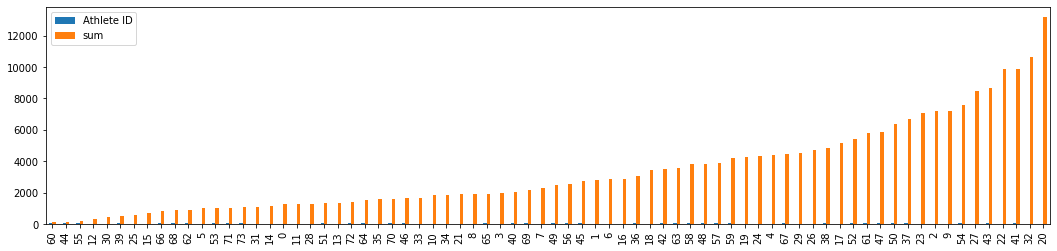

In [18]:
df_ath_ses[['Athlete ID','sum']].sort_values('sum').plot(kind='bar', figsize=(18,4))

From the plot above, we can clearly see that Athleted ID 60 did least number of sessions over all weeks whereas Athlete ID 20 did maximum number of sessions.

In [19]:
df_ath_ses.loc[0:,['Day0','Day1','Day2','Day3','Day4','Day5','Day6']].mean(axis=1).mean()

479.2471042471043

On an average, each Athlete did 480 sessions/week.

In [20]:
df_date_km = pd.DataFrame()
df_date_km['Day0'] = df_day.groupby('Athlete ID')['total km'].sum()
df_date_km['Day1'] = df_day.groupby('Athlete ID')['total km.1'].sum()
df_date_km['Day2'] = df_day.groupby('Athlete ID')['total km.2'].sum()
df_date_km['Day3'] = df_day.groupby('Athlete ID')['total km.3'].sum()
df_date_km['Day4'] = df_day.groupby('Athlete ID')['total km.4'].sum()
df_date_km['Day5'] = df_day.groupby('Athlete ID')['total km.5'].sum()
df_date_km['Day6'] = df_day.groupby('Athlete ID')['total km.6'].sum()

In [21]:
df_date_km.head()

,Day0,Day1,Day2,Day3,Day4,Day5,Day6
Athlete ID,,,,,,,
0,987.0,992.6,996.7,987.7,994.6,1016.6,974.0
1,7315.2,7279.5,7271.2,7233.2,7236.9,7197.9,7212.2
2,13198.1,13221.6,13221.8,13172.2,13209.2,13164.4,13143.4
3,2326.6,2325.5,2288.3,2287.5,2268.5,2239.7,2220.6
4,5951.3,5982.0,5978.6,5981.9,5999.0,5997.6,5981.5


In [22]:
df_date_km['sum'] = df_date_km.loc[0:,['Day0','Day1','Day2','Day3','Day4','Day5','Day6']].sum(axis=1)

In [23]:
df_date_km.reset_index(inplace=True)

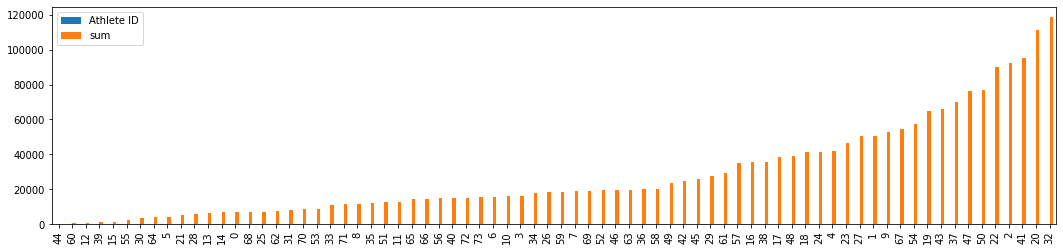

In [24]:
df_date_km[['Athlete ID','sum']].sort_values('sum').plot(kind='bar', figsize=(18,4))

Athlete ID 44 ran the least number of kilometres whereas Athlete ID 32 ran the highest number of kilometres.

In [25]:
df_date_ses = pd.DataFrame()

df_date_ses['Day0'] = df_day.groupby('Date')['nr. sessions'].sum()
df_date_ses['Day1'] = df_day.groupby('Date')['nr. sessions.1'].sum()
df_date_ses['Day2'] = df_day.groupby('Date')['nr. sessions.2'].sum()
df_date_ses['Day3'] = df_day.groupby('Date')['nr. sessions.3'].sum()
df_date_ses['Day4'] = df_day.groupby('Date')['nr. sessions.4'].sum()
df_date_ses['Day5'] = df_day.groupby('Date')['nr. sessions.5'].sum()
df_date_ses['Day6'] = df_day.groupby('Date')['nr. sessions.6'].sum()

In [26]:
df_date_ses.head()

,Day0,Day1,Day2,Day3,Day4,Day5,Day6
Date,,,,,,,
0,27.0,34.0,38.0,31.0,28.0,30.0,23.0
1,34.0,38.0,31.0,28.0,30.0,23.0,27.0
2,38.0,31.0,28.0,30.0,23.0,27.0,31.0
3,31.0,28.0,30.0,23.0,27.0,31.0,36.0
4,28.0,30.0,24.0,27.0,32.0,37.0,33.0


The above dataframe shows us the total number of sessions for each week for all the athletes.

In [27]:
df_date_ses['sum'] = df_date_ses.loc[0:,['Day0','Day1','Day2','Day3','Day4','Day5','Day6']].sum(axis=1)

In [28]:
df_date_ses.reset_index(inplace=True)

In [29]:
df_date_ses.sort_values('sum')

,Date,Day0,Day1,Day2,Day3,Day4,Day5,Day6,sum
600,640,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
2613,2673,1.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0
595,598,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0
598,606,1.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0
2612,2665,0.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...
93,93,37.0,28.0,13.0,49.0,52.0,44.0,47.0,270.0
97,97,52.0,44.0,47.0,45.0,46.0,7.0,35.0,276.0
94,94,28.0,13.0,49.0,52.0,44.0,47.0,45.0,278.0
96,96,49.0,52.0,44.0,47.0,45.0,46.0,7.0,290.0


From the above table, we can clearly see that Week 600 had the lowest number of sessions (3) whereas Week 95 had the highest number of sessions (296) for all the athletes.

# **5.0 Model Training**

In this section, we will build 4 models, namely Deep Neural Network Model (DNN), k-Nearest Neighbors (k-NN), Random Forest, and Xgboost Model.

## **Deep Neural Network Model (DNN)**

In [30]:
#Setting the dimensions of any figure that is going to be displayed in the notebook
mpl.rcParams['figure.figsize'] = (15, 18)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [31]:
#Read data
file = tf.keras.utils
raw_df = pd.read_csv('day_approach_maskedID_timeseries.csv')
convert_dict = {'nr. sessions': int } #convert nr.sessions to int 
raw_df = raw_df.astype(convert_dict)

In [32]:
# This section displays the percentage of the majority class
neg, pos = np.bincount(raw_df['injury'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 42766
    Positive: 583 (1.36% of total)



In [33]:
#Dropping the unnecessary columns/features
cleaned_df = raw_df.copy()
cleaned_df.pop('Date')
cleaned_df.pop('Athlete ID')

0         0
1         0
2         0
3         0
4         0
         ..
42761    71
42762    71
42763    71
42764    71
42765    71
Name: Athlete ID, Length: 42766, dtype: int64

In [34]:
X = cleaned_df.drop('injury', axis = 1)
y = cleaned_df['injury']

In [35]:
X.shape

(42766, 70)

**Applying Synthetic Minority Oversampling Technique (SMOTE)**

In [36]:
#This is because the data is so imbalanced. The minority class is oversampled with new similar data is generated to compensate its minimal numbers
smote_technique = SMOTE(sampling_strategy='minority')
X_smt, y_smt = smote_technique.fit_resample(X, y)

In [37]:
y_smt.value_counts() #class counts now match

0    42183
1    42183
Name: injury, dtype: int64

In [38]:
#Data is split to Train and test 
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_smt, y_smt, test_size=0.3, random_state=15, stratify=y_smt)

**Defining the Deep Nearal Network Model**

In [39]:
#Initializing DNN Model
dnn_model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(70,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

#Set up early stopping metrics to avoid overfitting

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    verbose=1,
    patience=10,
    mode='min',
    restore_best_weights=True)

In [40]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [41]:
#Model compliation
dnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=METRICS)

In [42]:
#fit the model with epochs 300 and using early stopping callbacks method.

dnn_model.fit(X_train_smt, y_train_smt, callbacks = [early_stopping], epochs=300)

Epoch 1/300
1846/1846 [==============================] - 9s 3ms/step - loss: 0.6734 - tp: 20985.0000 - fp: 16309.0000 - tn: 13219.0000 - fn: 8543.0000 - accuracy: 0.5792 - precision: 0.5627 - recall: 0.7107 - auc: 0.6120 - prc: 0.5728
Epoch 2/300
1846/1846 [==============================] - 4s 2ms/step - loss: 0.6017 - tp: 24600.0000 - fp: 14565.0000 - tn: 14963.0000 - fn: 4928.0000 - accuracy: 0.6699 - precision: 0.6281 - recall: 0.8331 - auc: 0.7182 - prc: 0.6623
Epoch 3/300
1846/1846 [==============================] - 4s 2ms/step - loss: 0.5648 - tp: 25334.0000 - fp: 13150.0000 - tn: 16378.0000 - fn: 4194.0000 - accuracy: 0.7063 - precision: 0.6583 - recall: 0.8580 - auc: 0.7554 - prc: 0.6930
Epoch 4/300
1846/1846 [==============================] - 4s 2ms/step - loss: 0.5408 - tp: 25680.0000 - fp: 12225.0000 - tn: 17303.0000 - fn: 3848.0000 - accuracy: 0.7278 - precision: 0.6775 - recall: 0.8697 - auc: 0.7771 - prc: 0.7158
Epoch 5/300
1846/1846 [==============================] - 4s 

In [43]:
#Using the trained model, the prediction is done on the test set
dnn_preds_smt = dnn_model.predict(X_test_smt)
dnn_preds_smt = np.round(dnn_preds_smt)

791/791 [==============================] - 1s 1ms/step


**DNN Model Evaluation**

In [44]:
#Display the classification report of the model out of prediction using the test data
print(classification_report(y_test_smt,dnn_preds_smt))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     12655
           1       0.88      0.97      0.92     12655

    accuracy                           0.92     25310
   macro avg       0.92      0.92      0.92     25310
weighted avg       0.92      0.92      0.92     25310



In [45]:
#function to display the confusion matrix
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Legitimate Transactions Detected (True Negatives):  10908
Legitimate Transactions Incorrectly Detected (False Positives):  1747
Fraudulent Transactions Missed (False Negatives):  381
Fraudulent Transactions Detected (True Positives):  12274
Total Fraudulent Transactions:  12655


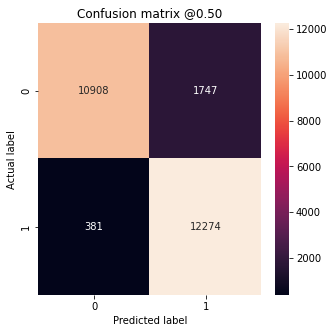

In [46]:
plot_cm(y_test_smt, dnn_preds_smt)

**Saving the trained Model**

In [47]:
# Calling `save('my_model')` creates a SavedModel folder `dnn_model`.
dnn_model.save("dnn_model")

**Sample prediction**

In [48]:
def predict(model, record):
    k = np.array(record).reshape(1,70)
    prediction = int(np.round(dnn_model.predict(k))[0][0])
    return prediction

In [49]:
#Sample record to predict
k = np.array(X_test_smt.iloc[1]).reshape(1,70)

In [50]:
#Predict using the loaded saved model
reconstructed_model = keras.models.load_model("dnn_model")

In [51]:
predict(reconstructed_model,k)

1/1 [==============================] - 0s 44ms/step


1

## **k-Nearest Neighbors Model (KNN)**

In [52]:
# check shape of training and test data
print("Training data size: ", X_train_smt.shape)
print("Test data size: ", X_test_smt.shape)

Training data size:  (59056, 70)
Test data size:  (25310, 70)


**Defining KNN Model**

In [53]:
#Define model
knn_model = KNeighborsClassifier()

#fit model
knn_model.fit(X_train_smt, y_train_smt)

KNeighborsClassifier()

Note: In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [54]:
#Using the trained model, the prediction is done on the test set
knn_preds_smt = knn_model.predict(X_test_smt)
knn_preds_smt = np.round(knn_preds_smt)

**k-NN model evaluation**

In [55]:
#Display the classification report of the model out of prediction using the test data
print(classification_report(y_test_smt, knn_preds_smt))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92     12655
           1       0.87      0.99      0.93     12655

    accuracy                           0.92     25310
   macro avg       0.93      0.92      0.92     25310
weighted avg       0.93      0.92      0.92     25310



In [56]:
#function to display the confusion matrix
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Correct Non-injury predictions (True Negatives): ', cm[0][0])
    print('Incorrect Non-injury predictions (False Positives): ', cm[0][1])
    print('Correct injury predictions (False Negatives): ', cm[1][0])
    print('Incorrect injury predictions (True Positives): ', cm[1][1])
    print('Total injury predictions: ', np.sum(cm[1]))

Correct Non-injury predictions (True Negatives):  10797
Incorrect Non-injury predictions (False Positives):  1858
Correct injury predictions (False Negatives):  93
Incorrect injury predictions (True Positives):  12562
Total injury predictions:  12655


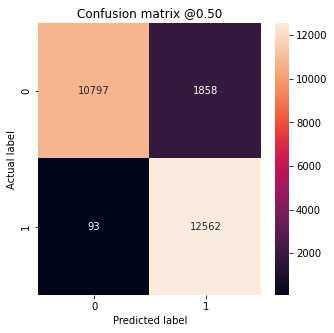

In [57]:
plot_cm(y_test_smt, knn_preds_smt)

**Optimize KNN Model**

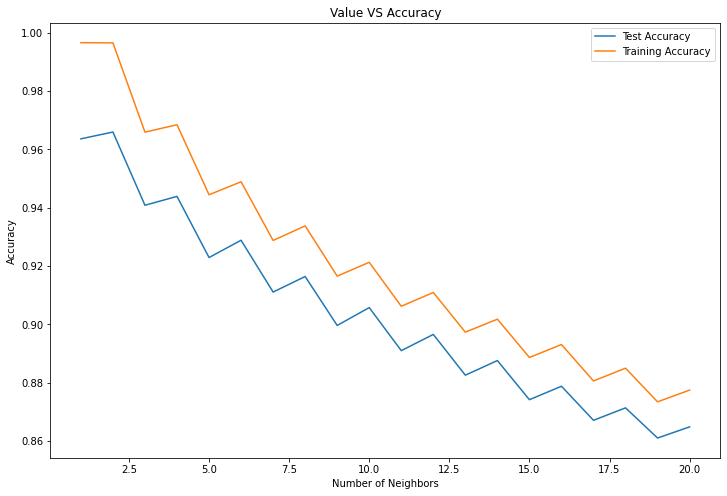

Best accuracy is 0.9659818253654682 with n = 2


In [58]:
# set range of n values
neighbor = range(1, 21)
train_acc = []
test_acc = []

# Loop through different values of n
for i, n in enumerate(neighbor):
    # n from 1 to 20
    knn_model = KNeighborsClassifier(n_neighbors=n)
    
    # Fit with knn
    knn_model.fit(X_train_smt,y_train_smt)
    
    # train accuracy
    train_acc.append(knn_model.score(X_train_smt, y_train_smt))
    
    # test accuracy
    test_acc.append(knn_model.score(X_test_smt, y_test_smt))

# line plot
plt.figure(figsize=[12, 8])
plt.plot(neighbor, test_acc, label = 'Test Accuracy')
plt.plot(neighbor, train_acc, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
#plt.xticks(neig)
#plt.savefig('graph.png')
plt.show()

# print best score
print("Best accuracy is {} with n = {}".format(np.max(test_acc), 1+test_acc.index(np.max(test_acc))))

In [59]:
knn_model_imp = KNeighborsClassifier(n_neighbors=2)
knn_model_imp.fit(X_train_smt, y_train_smt)

knn_preds_smt_imp = knn_model_imp.predict(X_test_smt)
knn_preds_smt_imp = np.round(knn_preds_smt_imp)

#Display the classification report of the model out of prediction using the test data
print(classification_report(y_test_smt, knn_preds_smt_imp))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     12655
           1       0.94      0.99      0.97     12655

    accuracy                           0.97     25310
   macro avg       0.97      0.97      0.97     25310
weighted avg       0.97      0.97      0.97     25310



Correct Non-injury predictions (True Negatives):  11886
Incorrect Non-injury predictions (False Positives):  769
Correct injury predictions (False Negatives):  92
Incorrect injury predictions (True Positives):  12563
Total injury predictions:  12655


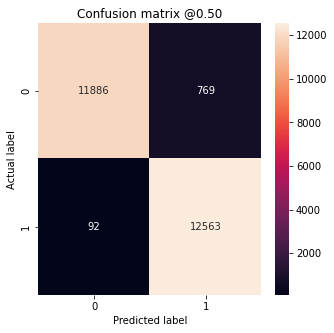

In [60]:
plot_cm(y_test_smt, knn_preds_smt_imp)

**Saving Model**

In [61]:
import pickle
file_name = "knn_model_day.pkl"

# save
pickle.dump(knn_model_imp, open(file_name, "wb"))

## **Random Forest Classifier Model**

In [62]:
#define model
rfc = RandomForestClassifier()

#fit model
rfc.fit(X_train_smt, y_train_smt)

RandomForestClassifier()

In [63]:
#Using the trained model, the prediction is done on the test set
rfc_preds_smt = rfc.predict(X_test_smt)
rfc_preds_smt = np.round(rfc_preds_smt)

**Model evaluation**

In [64]:
#Display the classification report of the model out of prediction using the test data
print(classification_report(y_test_smt, rfc_preds_smt))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12655
           1       1.00      0.98      0.99     12655

    accuracy                           0.99     25310
   macro avg       0.99      0.99      0.99     25310
weighted avg       0.99      0.99      0.99     25310



In [65]:
#function to display the confusion matrix
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Correct Non-injury predictions (True Negatives): ', cm[0][0])
    print('Incorrect Non-injury predictions (False Positives): ', cm[0][1])
    print('Correct injury predictions (False Negatives): ', cm[1][0])
    print('Incorrect injury predictions (True Positives): ', cm[1][1])
    print('Total injury predictions: ', np.sum(cm[1]))

Correct Non-injury predictions (True Negatives):  12648
Incorrect Non-injury predictions (False Positives):  7
Correct injury predictions (False Negatives):  225
Incorrect injury predictions (True Positives):  12430
Total injury predictions:  12655


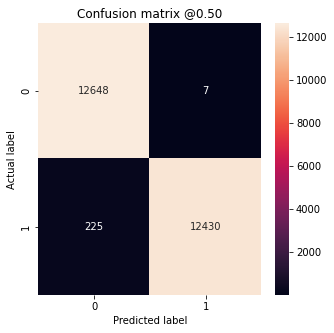

In [66]:
plot_cm(y_test_smt, rfc_preds_smt)

## **Xgboost Model**

In [67]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 42183, 1: 583})


In [68]:
#split train and test
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [69]:
#model definition
xgb_classifier = XGBClassifier(
    learning_rate =0.0009, 
    n_estimators=1000,

)

In [70]:
#generate weights to use on the XGBOOT, this is because the data is so imbalanced
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train_smt #provide your own target name
)

#fit the model
xgb_classifier.fit(X_train_smt, y_train_smt, sample_weight=sample_weights)

XGBClassifier(learning_rate=0.0009, n_estimators=1000)

In [71]:
# Performance on the train
auc = roc_auc_score(y_train_smt, xgb_classifier.predict(X_train_smt))
print("Performance sur le train : ", auc)

# Performance on the test
auc = roc_auc_score(y_test_smt, xgb_classifier.predict(X_test_smt))
print("Performance sur le test : ", auc)

Performance sur le train :  0.6601587194075679
Performance sur le test :  0.5754382796184455


In [72]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test_smt, xgb_classifier.predict(X_test_smt)).ravel()
# Error rate : 
err_rate = (fp + fn) / (tp + tn + fn + fp)
print("Error rate  : ", err_rate)
# Accuracy : 
acc_ = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy  : ", acc_)
# Sensitivity : 
sens_ = tp / (tp + fn)
print("Sensitivity  : ", sens_)
# Specificity 
sp_ = tn / (tn + fp)
print("Specificity  : ", sens_)
# False positive rate (FPR)
FPR = fp / (tn + fp)
print("False positive rate  : ", FPR)

Error rate  :  0.34840218238503506
Accuracy  :  0.6515978176149649
Sensitivity  :  0.49714285714285716
Specificity  :  0.49714285714285716
False positive rate  :  0.346266297905966


In [73]:
tn, fp, fn, tp = confusion_matrix(y_train_smt, xgb_classifier.predict(X_train_smt)).ravel()
# Error rate : 
err_rate = (fp + fn) / (tp + tn + fn + fp)
print("Error rate  on train set : ", err_rate)
# Accuracy : 
acc_ = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy  on train set  : ", acc_)

tn, fp, fn, tp = confusion_matrix(y_test_smt, xgb_classifier.predict(X_test_smt)).ravel()
# Error rate : 
err_rate = (fp + fn) / (tp + tn + fn + fp)
print("Error rate  on test set : ", err_rate)
# Accuracy : 
acc_ = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy  on test set  : ", acc_)

Error rate  on train set :  0.34617183324425443
Accuracy  on train set  :  0.6538281667557456
Error rate  on test set :  0.34840218238503506
Accuracy  on test set  :  0.6515978176149649


In [74]:
k1 = np.array(X_test_smt.iloc[700]).reshape(1,70)

In [75]:
#xgb_classifier.predict(k1)

In [76]:
print(classification_report(y_test_smt,xgb_classifier.predict(X_test_smt)))

              precision    recall  f1-score   support

           0       0.99      0.65      0.79     12655
           1       0.02      0.50      0.04       175

    accuracy                           0.65     12830
   macro avg       0.50      0.58      0.41     12830
weighted avg       0.98      0.65      0.78     12830



In [77]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Legitimate Transactions Detected (True Negatives):  8273
Legitimate Transactions Incorrectly Detected (False Positives):  4382
Fraudulent Transactions Missed (False Negatives):  88
Fraudulent Transactions Detected (True Positives):  87
Total Fraudulent Transactions:  175


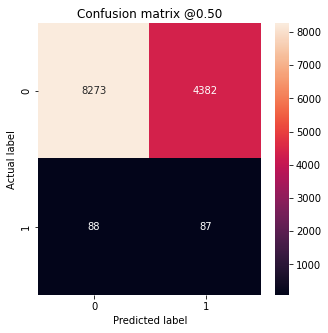

In [78]:
plot_cm(y_test_smt, xgb_classifier.predict(X_test_smt))

**Save the model**

In [80]:
'''import pickle
file_name = "xgb_model.pkl"

# save
pickle.dump(xgb, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

# test
k = np.array(X_test_smt.iloc[700]).reshape(1,70)
xgb_model_loaded.predict(k)[0]'''

'import pickle\nfile_name = "xgb_model.pkl"\n\n# save\npickle.dump(xgb, open(file_name, "wb"))\n\n# load\nxgb_model_loaded = pickle.load(open(file_name, "rb"))\n\n# test\nk = np.array(X_test_smt.iloc[700]).reshape(1,70)\nxgb_model_loaded.predict(k)[0]'

# **THANK YOU FOR TAKING TIME TO STUDY OUR NOTEBOOK. WE HOPE YOU GOT SOME INSIGHTS.**